In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Scikit-Learn



In [ ]:
from sklearn import datasets

dataset_funcs = [f for f in dir(datasets) if f.startswith("load_") or f.startswith("fetch_")]

print("Total number of dataset loaders:", len(dataset_funcs))
print("\nList of dataset loaders:\n")

for idx, name in enumerate(dataset_funcs, start=1):
    print(f"{idx}. {name}")


'''
Explanation:

# from sklearn import datasets: Imports the datasets module from sklearn. 
This module includes built-in datasets for experimentation.

# dir(datasets): Lists all attributes (functions, classes) inside the datasets module.

# The list comprehension filters out only the functions that start with "load_" or "fetch_". 
These are dataset loaders:
load_* loads small in-built datasets.
fetch_* fetches larger datasets from the internet.

Finally, it prints the total count and names of all dataset loader functions.
'''

Total number of dataset loaders: 23

List of dataset loaders:

1. fetch_20newsgroups
2. fetch_20newsgroups_vectorized
3. fetch_california_housing
4. fetch_covtype
5. fetch_file
6. fetch_kddcup99
7. fetch_lfw_pairs
8. fetch_lfw_people
9. fetch_olivetti_faces
10. fetch_openml
11. fetch_rcv1
12. fetch_species_distributions
13. load_breast_cancer
14. load_diabetes
15. load_digits
16. load_files
17. load_iris
18. load_linnerud
19. load_sample_image
20. load_sample_images
21. load_svmlight_file
22. load_svmlight_files
23. load_wine


In [6]:
from sklearn import datasets

# dataset_name = "load_iris": We want to load the famous Iris flower dataset.
dataset_name="load_iris"

# getattr(datasets, dataset_name): Dynamically fetches the function load_iris from datasets.

loader=getattr(datasets,dataset_name)

# dataset = loader(): Calls that function to load the dataset.
dataset=loader()

print(f"Loaded Dataset: {dataset_name}")
print(f"Data shape: {dataset.data.shape if hasattr(dataset,'data') else 'N/A'}")
print(f"Feature names: {dataset.feature_names if hasattr(dataset,'feature_names') else 'N/A'}")
print(f"Target shape: {dataset.target.shape if hasattr(dataset, 'target') else 'N/A'}")

Loaded Dataset: load_iris
Data shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target shape: (150,)


In [ ]:
from sklearn.utils import all_estimators

# Get all estimators
estimators = all_estimators()

print(f"Total number of estimators: {len(estimators)}\n")
print("List of available estimators:\n")

for idx, (name, _) in enumerate(estimators, start=1):
    print(f"{idx}. {name}")

'''
all_estimators(): Returns a list of all available estimators in scikit-learn. These include:

Classifiers (LogisticRegression, SVC, etc.)

Regressors (LinearRegression, Ridge, etc.)

Clustering models (KMeans, DBSCAN, etc.)

Transformers and more

The output is a list of tuples: (estimator_name, estimator_class)
'''

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris=load_iris()

df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['target']=iris.target

df.head()

'''
🔍 Explanation:
load_iris(): Loads the classic Iris flower dataset.

pd.DataFrame(...): Converts the dataset into a pandas DataFrame for easier data manipulation and visualization.

columns=iris.feature_names: Assigns column names like "sepal length (cm)", "petal width (cm)", etc.

df['target'] = iris.target: Adds a target column indicating the flower species (0, 1, 2).

df.head(): Displays the first 5 rows of the DataFrame.

🧠 Why useful?
Turning data into a DataFrame makes it easier to clean, explore, visualize, and prepare for modeling.
'''


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
print(df.shape)
print(df.dtypes)
df['target'].value_counts()

'''
🔍 Explanation:
df.shape: Returns the number of rows and columns in the dataset. Output: (150, 5) for 150 samples and 5 columns.

df.dtypes: Displays the data types of each column (float64 for features, int64 for target).

df['target'].value_counts(): Counts how many samples belong to each class:

Example: 0: 50, 1: 50, 2: 50 for balanced Iris dataset.

🧠 Helps in understanding the structure and distribution of data.
'''

(150, 5)
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object


target
0    50
1    50
2    50
Name: count, dtype: int64

In [ ]:
print(df.isnull().sum())

'''
🔍 Explanation:
Checks for missing values in each column.

.isnull() returns a boolean DataFrame indicating True where values are missing.

.sum() counts how many True (missing) values are in each column.

🧠 Clean data = ready for training.
'''

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [ ]:
df.describe()

'''
🧠 Useful for detecting scaling issues, outliers, and general trends.
'''

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


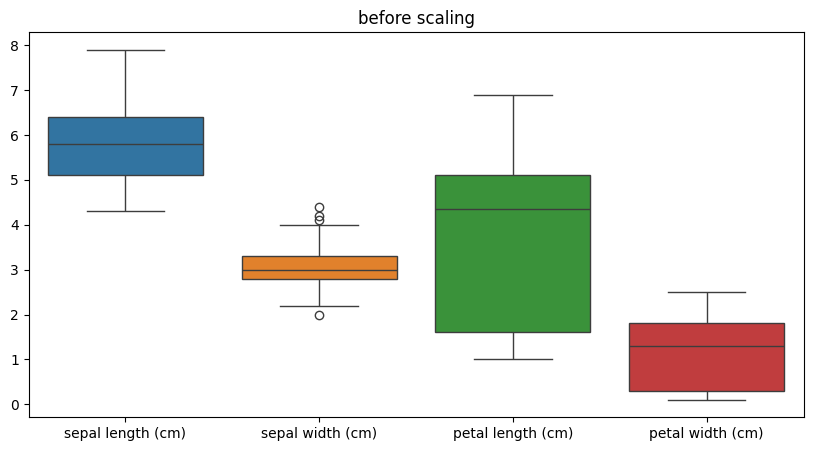

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure(figsize=(10,5))

sns.boxplot(data=df.iloc[:,:-1])
plt.title("before scaling")
plt.show()

'''
🔍 Explanation:
matplotlib.pyplot and seaborn are used for plotting.

plt.figure(figsize=(10, 5)): Sets the size of the plot.

sns.boxplot(...): Draws a boxplot for each feature (excluding the target column).

Boxplots visualize:

Median

Quartiles

Outliers

df.iloc[:, :-1]: Selects all columns except the last (target).

📊 Output: Shows if features are on different scales and helps decide whether feature scaling is needed.
'''

In [23]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(df.iloc[:,:-1]) #except target
y=df['target']

'''
🔍 Explanation:
StandardScaler: Scales data to have mean = 0 and standard deviation = 1.

df.iloc[:, :-1]: Selects all feature columns (not target).

scaler.fit_transform(...):

.fit() calculates mean & std for each feature.

.transform() scales each feature:

𝑧=𝑥−𝜇/𝜎
 
X_scaled: The scaled version of the feature matrix.

y: Target variable (class labels).

🧠 Why scale? Many ML models (like KNN, SVM, Gradient Descent-based models) perform better when features are on similar scales.

'''

'\n🔍 Explanation:\nStandardScaler: Scales data to have mean = 0 and standard deviation = 1.\n\ndf.iloc[:, :-1]: Selects all feature columns (not target).\n\nscaler.fit_transform(...):\n\n.fit() calculates mean & std for each feature.\n\n.transform() scales each feature:\n\n𝑧=𝑥−𝜇/𝜎\n\nX_scaled: The scaled version of the feature matrix.\n\ny: Target variable (class labels).\n\n🧠 Why scale? Many ML models (like KNN, SVM, Gradient Descent-based models) perform better when features are on similar scales.\n\n'

In [ ]:
scaled_df=pd.DataFrame(X_scaled,columns=df.columns[:-1])
print("\nAfter Scaling")
print(scaled_df.describe())

'''
🔍 Explanation:
Converts the scaled array X_scaled back to a pandas DataFrame for readability.

Uses original feature names as columns.

scaled_df.describe():

Shows that after scaling:

Mean ≈ 0

Std Dev ≈ 1

Minimum and maximum values vary but are centered.

📊 Output confirms that the scaling worked.
'''


After Scaling
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -1.468455e-15     -1.823726e-15      -1.610564e-15   
std         1.003350e+00      1.003350e+00       1.003350e+00   
min        -1.870024e+00     -2.433947e+00      -1.567576e+00   
25%        -9.006812e-01     -5.923730e-01      -1.226552e+00   
50%        -5.250608e-02     -1.319795e-01       3.364776e-01   
75%         6.745011e-01      5.586108e-01       7.627583e-01   
max         2.492019e+00      3.090775e+00       1.785832e+00   

       petal width (cm)  
count      1.500000e+02  
mean      -9.473903e-16  
std        1.003350e+00  
min       -1.447076e+00  
25%       -1.183812e+00  
50%        1.325097e-01  
75%        7.906707e-01  
max        1.712096e+00  


In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)

'''
🔍 Explanation:
train_test_split(...):

Splits your data into training (80%) and testing (20%) sets.

random_state=42: Ensures reproducibility.

stratify=y: Ensures that class distribution is maintained in both train and test sets.

X_train, X_test: Feature matrices for training and testing.

y_train, y_test: Corresponding target labels.

🧠 Essential step before model training to evaluate performance on unseen data.
'''

'\n🔍 Explanation:\ntrain_test_split(...):\n\nSplits your data into training (80%) and testing (20%) sets.\n\nrandom_state=42: Ensures reproducibility.\n\nstratify=y: Ensures that class distribution is maintained in both train and test sets.\n\nX_train, X_test: Feature matrices for training and testing.\n\ny_train, y_test: Corresponding target labels.\n\n🧠 Essential step before model training to evaluate performance on unseen data.\n'

In [28]:
print("Train Features Shape:", X_train.shape)
print("Train Targets Shape:", y_train.shape)
print("Test Features Shape:", X_test.shape)
print("Test Targets Shape:", y_test.shape)


Train Features Shape: (120, 4)
Train Targets Shape: (120,)
Test Features Shape: (30, 4)
Test Targets Shape: (30,)


In [29]:
from sklearn.svm import SVC

svm_model=SVC(kernel='linear',C=1.0,random_state=42)
svm_model.fit(X_train,y_train)

'''
🔸 from sklearn.svm import SVC
This imports the Support Vector Classifier (SVC) from sklearn.svm.

SVC is used for classification problems using the Support Vector Machine (SVM) algorithm.

🔸 svm_model = SVC(kernel='linear', C=1.0, random_state=42)
What this does:
It creates an instance of the SVM classifier with the following parameters:

kernel='linear':

The SVM uses a linear decision boundary (hyperplane).

This means it tries to find a straight line (or hyperplane) that separates the classes best.

Other kernels include 'rbf', 'poly', and 'sigmoid'.

C=1.0:

This is the regularization parameter.

It controls the trade-off between maximizing the margin and minimizing classification error.

🔸 A lower C (like 0.1) allows more margin violations (softer margin, better generalization).

🔸 A higher C (like 1000) tries to fit the training data very strictly (harder margin, less generalization).

random_state=42:

Ensures reproducibility.

It affects certain internal steps like shuffling, but for SVC, this is only relevant if probability=True or shrinking is involved.

🔸 svm_model.fit(X_train, y_train)
This trains the SVM model using the training data:

X_train: Your feature matrix (already scaled).

y_train: The corresponding class labels.

🧠 During training:

SVM finds the optimal hyperplane that separates the classes in your data.

For linearly separable classes, this is just a straight line or plane.

It identifies the support vectors — the critical data points closest to the margin, which define the decision boundary.

✅ Summary of This Cell:
You're training a linear Support Vector Machine classifier on the scaled iris dataset, using a default regularization parameter C=1.0. This is a classic and effective baseline for classification tasks.

'''

"\n🔸 from sklearn.svm import SVC\nThis imports the Support Vector Classifier (SVC) from sklearn.svm.\n\nSVC is used for classification problems using the Support Vector Machine (SVM) algorithm.\n\n🔸 svm_model = SVC(kernel='linear', C=1.0, random_state=42)\nWhat this does:\nIt creates an instance of the SVM classifier with the following parameters:\n\nkernel='linear':\n\nThe SVM uses a linear decision boundary (hyperplane).\n\nThis means it tries to find a straight line (or hyperplane) that separates the classes best.\n\nOther kernels include 'rbf', 'poly', and 'sigmoid'.\n\nC=1.0:\n\nThis is the regularization parameter.\n\nIt controls the trade-off between maximizing the margin and minimizing classification error.\n\n🔸 A lower C (like 0.1) allows more margin violations (softer margin, better generalization).\n\n🔸 A higher C (like 1000) tries to fit the training data very strictly (harder margin, less generalization).\n\nrandom_state=42:\n\nEnsures reproducibility.\n\nIt affects certai

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.fit_transform(X_test)

'''
🔍 Explanation:
PCA(n_components=2):

We reduce the 4-dimensional feature space (Iris dataset) to 2 dimensions.

These 2 principal components capture the maximum variance in the data.

pca.fit_transform(X_train):

fit: Computes the principal components from the training data.

transform: Projects the original 4D data onto the new 2D space.

Result: X_train_pca is now of shape (120, 2).

pca.transform(X_test):

Applies the same transformation (learned from training) to the test data.

🧠 Why PCA?

Great for visualization.

Reduces computational complexity.

Helps in noise reduction and understanding structure in data.


'''

'\n🔍 Explanation:\nPCA(n_components=2):\n\nWe reduce the 4-dimensional feature space (Iris dataset) to 2 dimensions.\n\nThese 2 principal components capture the maximum variance in the data.\n\npca.fit_transform(X_train):\n\nfit: Computes the principal components from the training data.\n\ntransform: Projects the original 4D data onto the new 2D space.\n\nResult: X_train_pca is now of shape (120, 2).\n\npca.transform(X_test):\n\nApplies the same transformation (learned from training) to the test data.\n\n🧠 Why PCA?\n\nGreat for visualization.\n\nReduces computational complexity.\n\nHelps in noise reduction and understanding structure in data.\n\n\n'

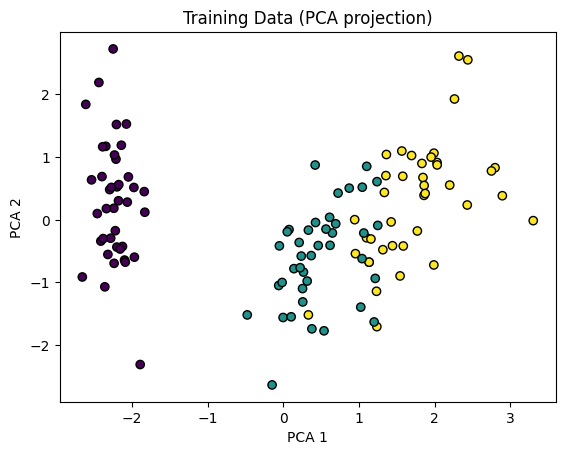

In [ ]:
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train,cmap='viridis', edgecolor='k')
plt.title("Training Data (PCA projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

'''
🔍 Explanation:
plt.scatter(...):

Plots the data points in the 2D PCA space.

X_train_pca[:, 0]: First principal component (x-axis).

X_train_pca[:, 1]: Second principal component (y-axis).

c=y_train: Colors the points based on their class label (0, 1, 2).

cmap='viridis': Color gradient.

edgecolor='k': Adds a black edge to each point for clarity.

plt.title, xlabel, ylabel: Adds context to the graph.

🧠 What This Achieves:
Visualizes how the three Iris classes (Setosa, Versicolor, Virginica) cluster in 2D space.

Helps understand separability of classes and variance captured.


'''

In [34]:
svm_pca = SVC(kernel='linear', C=1.0, random_state=42)
svm_pca.fit(X_train_pca, y_train)

'''
🔸 svm_pca.fit(X_train_pca, y_train)
Trains the SVM on the 2D representation of the data (after PCA).

X_train_pca has only 2 features instead of the original 4.

y_train is unchanged (target labels).

🧠 This means:

You're using the projected, lower-dimensional version of the original training data.

The SVM now learns a decision boundary in this reduced space.

This is helpful not only for visualization but also for faster training and sometimes better generalization (by removing noise).

✅ Why Do This?
Combining PCA + SVM is a common and effective pipeline:

PCA removes redundant or noisy dimensions.

SVM focuses on building a clean separating hyperplane.

It allows you to visualize the classification boundary more easily, since we’re now in 2D.
'''

"\n🔸 svm_pca.fit(X_train_pca, y_train)\nTrains the SVM on the 2D representation of the data (after PCA).\n\nX_train_pca has only 2 features instead of the original 4.\n\ny_train is unchanged (target labels).\n\n🧠 This means:\n\nYou're using the projected, lower-dimensional version of the original training data.\n\nThe SVM now learns a decision boundary in this reduced space.\n\nThis is helpful not only for visualization but also for faster training and sometimes better generalization (by removing noise).\n\n✅ Why Do This?\nCombining PCA + SVM is a common and effective pipeline:\n\nPCA removes redundant or noisy dimensions.\n\nSVM focuses on building a clean separating hyperplane.\n\nIt allows you to visualize the classification boundary more easily, since we’re now in 2D.\n"

In [35]:
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

'''
🔍 Explanation:
You’re creating a fine grid of (x, y) points across the entire PCA plot area.

np.linspace(..., 500): Generates 500 evenly spaced points between min and max.

np.meshgrid(...): Combines them into a full 2D grid, which is required for plotting surfaces.

🧠 This grid will be used to evaluate what class the model would predict at every location in 2D space.

'''

'\n🔍 Explanation:\nYou’re creating a fine grid of (x, y) points across the entire PCA plot area.\n\nnp.linspace(..., 500): Generates 500 evenly spaced points between min and max.\n\nnp.meshgrid(...): Combines them into a full 2D grid, which is required for plotting surfaces.\n\n🧠 This grid will be used to evaluate what class the model would predict at every location in 2D space.\n\n'

In [36]:
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
'''
🔍 Explanation:
np.c_[xx.ravel(), yy.ravel()]: Combines the grid coordinates into pairs like 
(x1,y1),(x2,y2)... for prediction.

svm_pca.predict(...): Predicts class labels for each point in the grid.

Z.reshape(xx.shape): Converts the flat list of predictions back into a 2D matrix matching the grid.

This gives you a label (class) for every point in the 2D space.
'''

'\n🔍 Explanation:\nnp.c_[xx.ravel(), yy.ravel()]: Combines the grid coordinates into pairs like \n(x1,y1),(x2,y2)... for prediction.\n\nsvm_pca.predict(...): Predicts class labels for each point in the grid.\n\nZ.reshape(xx.shape): Converts the flat list of predictions back into a 2D matrix matching the grid.\n\nThis gives you a label (class) for every point in the 2D space.\n'

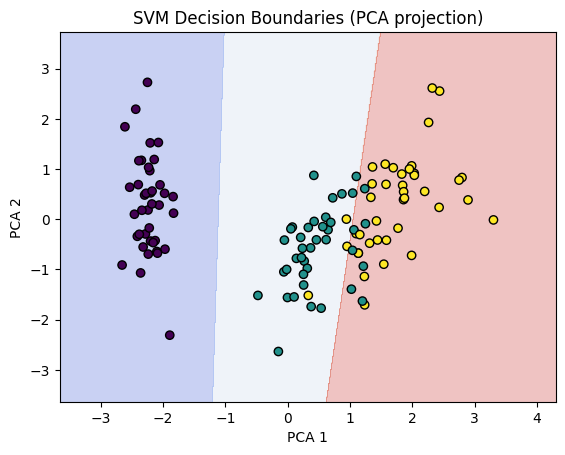

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap='viridis')
plt.title("SVM Decision Boundaries (PCA projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

'''
🔍 Explanation:
plt.contourf(...):

Plots the predicted regions (boundaries) where the classifier assigns each class.

alpha=0.3: Makes the background semi-transparent.

cmap='coolwarm': Color gradient to distinguish regions.

plt.scatter(...):

Plots the original training points (from PCA-transformed space).

c=y_train: Colors them based on actual class.

edgecolor='k': Adds a black edge to each point for better visibility.
'''


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


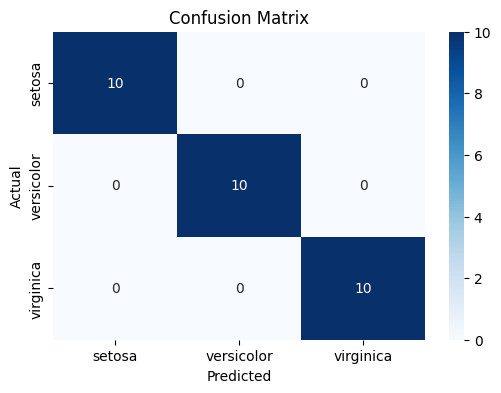

'\n🔍 Explanation:\nclassification_report: Gives precision, recall, F1-score, and support for each class.\n\naccuracy_score: Gives the overall accuracy (i.e., how many test predictions were correct).\n\nconfusion_matrix: Shows how many instances of each class were correctly or incorrectly classified.\n\ny_pred = svm_model.predict(X_test):\n\nUses the original SVM (not the PCA one) to predict labels for the test set.\n\n\n'

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = svm_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


'''
🔍 Explanation:
classification_report: Gives precision, recall, F1-score, and support for each class.

accuracy_score: Gives the overall accuracy (i.e., how many test predictions were correct).

confusion_matrix: Shows how many instances of each class were correctly or incorrectly classified.

y_pred = svm_model.predict(X_test):

Uses the original SVM (not the PCA one) to predict labels for the test set.

Precision: % of predicted labels that were correct.

Recall: % of actual class samples that were correctly predicted.

F1-score: Harmonic mean of precision and recall.

Support: Number of actual samples for each class.

sns.heatmap(...):

Creates a visual heatmap.

annot=True: Displays numbers in each cell.

xticklabels, yticklabels: Use Iris class names (setosa, versicolor, virginica).
'''